# Predict the winner of an Indian Premier League Cricket Match


Name : Chandra Kumar Basavaraju

Objective : To predict the winner of the match in the Indian Premier League.

Project Description :

Given below features :
1. Team 1 playing the game 
2. Team 2 playing the game
3. Venue
4. Is it a home game for any of the two teams?
5. Game time
6. Who won the toss?
7. What did the toss winner opted to?

the goalis to predict which team will probably WIN the Indian Premier League game based on their past performances.
I have collected data for all the Indian Premier League games that have taken place from 2008(the inaugural edition)till date.  

In [192]:
import numpy as np
import csv
from collections import Counter
import matplotlib.pyplot as plt

%matplotlib inline

class IPL:
    def load_ipl():
        with open('DATA_FINAL.csv') as csv_file:
            data_file = csv.reader(csv_file)
            temp = next(data_file)
            a = int(temp[0])
            b = int(temp[1])
            data = np.empty((a,b),dtype=object)
            target = np.empty((a,),dtype=object)
            feature_names = next(data_file)
            print('Number of Instances : ',a)
            print('Number of features :',b)
            print('Input classes : ',feature_names[:-1])
            print('Output class : ',feature_names[-1])
                        
            for i,ir in enumerate(data_file):
                data[i] = np.asarray(ir[:-1],dtype=object)
                target[i] = ir[-1]
                            
            return data, target,feature_names

X, Y, feature_names = IPL.load_ipl()

Number of Instances :  584
Number of features : 7
Input classes :  ['Team1', 'Team2', 'Venue', 'Home Team', 'Start Time', 'Toss winner', "Toss winner's decision"]
Output class :  Match Winner


In [211]:
#array to hold all the individual feature values present in all the instances of the data
team_one = [] #team 1 playing the game
team_two = [] #team 2 playing the game
venue = [] #venue for the game
home_team = [] #is it a home game to any of the two teams? if yes, home game for Team 1 or Team 2?
match_time = [] #start time of the game
toss_winner = [] #which team won the toss?
toss_winner_decision = [] #toss winning team choose to bat or field first?

#seperating all the features
for i,x in enumerate(X):
    team_one.append(x[0])
    team_two.append(x[1])
    venue.append(x[2])
    home_team.append(x[3])
    match_time.append(x[4])
    toss_winner.append(x[5])
    toss_winner_decision.append(x[6])
    
#team name can be as team1 or team2. forming the total list
matches = team_one
for i in team_two:
    matches.append(i)

#calculating the count of possile values of features
c_m = Counter(matches)
c_start_time = Counter(match_time)
c_venue = Counter(venue)
c_toss = Counter(toss_winner)
c_decision = Counter(toss_winner_decision)

#calculating the count of possile values of output class
c_match_won = Counter(Y)

#calculating number of times home team has won the game
home_team_wins = 0
away_team_wins = 0
no_results = 0
neutral_games = 0
for i,temp in enumerate(home_team):
    if temp == 'Team 1':
        if Y[i] == team_one[i]:
            home_team_wins += 1
        elif Y[i] == team_two[i]:
            away_team_wins += 1
        else :
            no_results += 1
    elif temp == 'Team 2':
        if Y[i] == team_two[i]:
            home_team_wins += 1
        elif Y[i] == team_one[i]:
            away_team_wins += 1
        else :
            no_results += 1
    else :
        neutral_games += 1
print("Number of games the home team has won :{0}".format(home_team_wins))
print("Number of games the away team has won : {0}".format(away_team_wins))
print("\n")
print("Number of neutral games(None of the two teams is the home team) : {0}".format(neutral_games))
print("\n")
print("Number of games without a result: {0}".format(no_results))
print("\n\n")

#calculating number of times the team which one the toss also won the game
won_toss_and_also_the_game = 0
for i in range(len(Y)):
    if toss_winner[i] == Y[i]:
        won_toss_and_also_the_game += 1
print("Number of games won by the team which won the toss : {0}".format(won_toss_and_also_the_game))

#calculating number of games won by the teams batting first
team_batting_first_won_the_game = 0
for i,toss_winning_team in enumerate(toss_winner):
    if toss_winner_decision[i] == "bat": #if toss winning team chose to bat first,
        if toss_winning_team == Y[i]: #did the toss winning team win the match?
            team_batting_first_won_the_game += 1
    elif toss_winner_decision[i] == "field": #if the toss winning team choose to field
        if toss_winning_team != Y[i]: #did the toss winning team lose the match?
            team_batting_first_won_the_game += 1
print("\nNumber of games won by team batting first : {0}".format(team_batting_first_won_the_game))

Number of games the home team has won :255
Number of games the away team has won : 216


Number of neutral games(None of the two teams is the home team) : 104


Number of games without a result: 9



Number of games won by the team which won the toss : 296

Number of games won by team batting first : 262


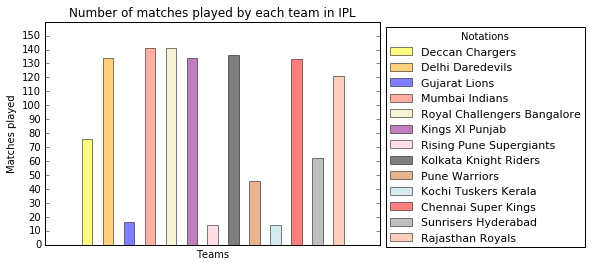

In [194]:
team = list(c_m.keys())
played = list(c_m.values())
n_groups = len(team)

#t_l = ['CSK','SRH','MI','DD','DC','PWI','KXIP','KKR','KTK','RR','RCB','RPS','GL']
t_c = ["yellow","orange","blue","tomato","palegoldenrod","purple","pink","black","chocolate","lightblue","red","grey","lightsalmon"]

fig1,ax1 = plt.subplots()

for j in range(n_groups):
    ax1.bar(j,played[j],0.5,alpha=0.5,color=t_c[j],label=team[j],align='center')
  
ax1.set_xlabel('Teams')
ax1.set_ylabel('Matches played')
ax1.set_title('Number of matches played by each team in IPL')
ax1.set_xticks([])
ax1.set_yticks(np.arange(0, max(played)+10,10))
ax1.legend(loc='upper left', prop={'size':11}, bbox_to_anchor=(1,1),title='Notations')

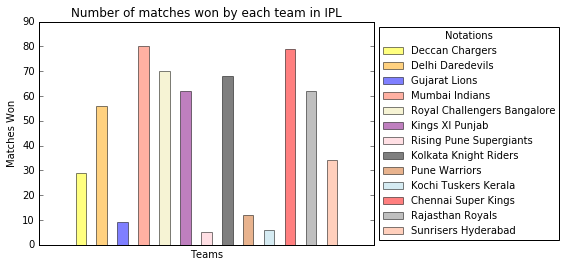

In [195]:
del c_match_won['NA']
l = len(c_match_won)
team = list(c_match_won.keys())
won = list(c_match_won.values())

fig2,ax2 = plt.subplots()

for j in range(l):
    if team[j] == "NA":
        continue
    ax2.bar(j,won[j],0.5,alpha=0.5,color=t_c[j],label=team[j],align='center')
    
ax2.set_xlabel('Teams')
ax2.set_ylabel('Matches Won')
ax2.set_title('Number of Matches won by each team in IPL')
ax2.set_xticks([])
ax2.set_yticks(np.arange(0.0, max(won)+20,10))
ax2.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),title='Notations')

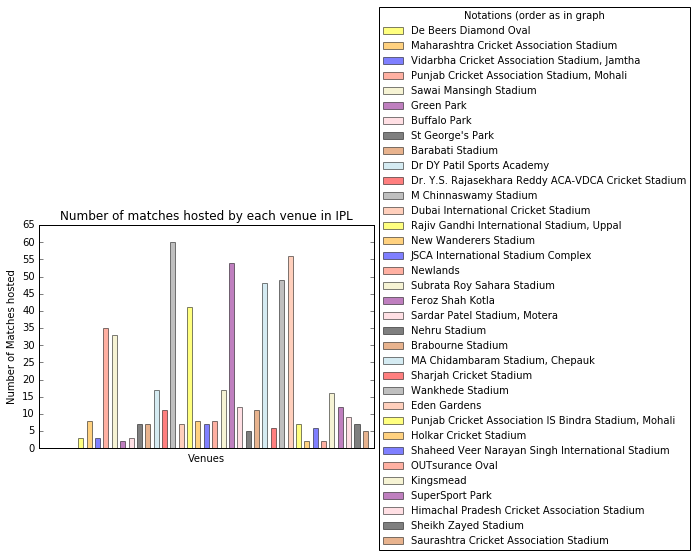

In [196]:
l = len(c_venue)
venue = list(c_venue.keys())
hosted = list(c_venue.values())

colors = ["yellow","orange","blue","tomato","palegoldenrod","purple","pink","black","chocolate","lightblue","red","grey","lightsalmon"]
fig3,ax3 = plt.subplots()

for j in range(l):
    ax3.bar(j,hosted[j],width = 0.6,alpha=0.5,label=venue[j],align='center',color=colors[j%13])
    
ax3.set_xlabel('Venues')
ax3.set_ylabel('Number of Matches hosted')
ax3.set_title('Number of matches hosted by each venue in IPL')
ax3.set_xticks([])
ax3.set_yticks(np.arange(0, max(hosted)+10,5))
ax3.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,2),title='Notations (order as in graph')

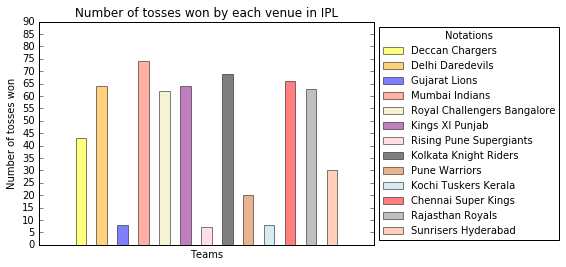

In [197]:
del c_toss["NA"]
l = len(c_toss)
team_names = list(c_toss.keys())
tosses_won = list(c_toss.values())

fig4,ax4 = plt.subplots()

for j in range(l):
    ax4.bar(j,tosses_won[j],0.5,alpha=0.5,color=t_c[j],label=team_names[j],align='center')
    
ax4.set_xlabel('Teams')
ax4.set_ylabel('Number of tosses won')
ax4.set_title('Number of tosses won by each team in IPL')
ax4.set_xticks([])
ax4.set_yticks(np.arange(0, max(tosses_won)+20,5))
ax4.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),title='Notations')

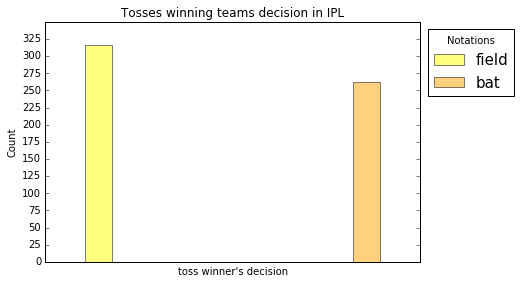

In [198]:
del c_decision["NA"]
decision = list(c_decision.keys())
count = list(c_decision.values())
l = len(c_decision)

fig5,ax5 = plt.subplots()

for j in range(l):
    ax5.bar(j,count[j],width=0.1,alpha=0.5,label=decision[j],align='center',color=t_c[j])
    
ax5.set_xlabel('toss winner\'s decision')
ax5.set_ylabel('Count')
ax5.set_title('Tosses winning teams decision in IPL')
ax5.set_xticks([])
ax5.set_yticks(np.arange(0, max(count)+20,25))
ax5.legend(loc='upper left', prop={'size':15}, bbox_to_anchor=(1,1),title='Notations')
plt.tight_layout(pad=1)

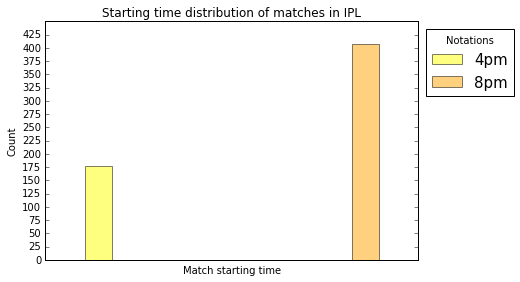

In [199]:
time = list(c_start_time.keys())
count = list(c_start_time.values())
l = len(c_start_time)

fig6,ax6 = plt.subplots()

for j in range(l):
    ax6.bar(j,count[j],width=0.1,alpha=0.5,label=time[j],color=t_c[j],align='center')
    
ax6.set_xlabel('Match starting time')
ax6.set_ylabel('Count')
ax6.set_title('Starting time distribution of matches in IPL')
ax6.set_xticks([])
ax6.set_yticks(np.arange(0, max(count)+20,25))
ax6.legend(loc='upper left', prop={'size':15}, bbox_to_anchor=(1,1),title='Notations')
plt.tight_layout()